# US Census Data on Guns
## Investigate a Dataset Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data comes from the FBI's National Instant Criminal Background Check System (NICS). The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

We will conduct an analysis of US census data in relation to the FBI's NICS gun data by taking a micro approach and focusing on the state of Maryland.

Questions that will be explored in this dataset are:
* What was the highest year for gun sales in Maryland?
* What was the most sold gun type in Maryland during the second highest year for gun sales?
* What was Marylands gun per capita in 2016?

In [1]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Opening and reading files
census = pd.read_csv('us_census_data.csv')
gun = pd.read_excel('gun_data.xlsx')

In [3]:
# Analyze columns and sample of gun dataset
print(gun.shape)
gun.head(1)

(12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [4]:
# Analyze columns and sample of census dataset
print(census.shape)
census.head(1)

(85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


#### NOTE
There are several issues with both datasets. There are null values, datatype discrepancies (e.g. dates, integers and characters in the same cell etc.), and a lot of extraneous information.

In addition, an important detail to note is the axis issue with the census data. In order to make the analysis easier, we will need to flip the rows and columns to improve legibility and sorting for the purposes of our exploration.

### Continue data wrangling to understand what will need to be cleaned
This will include checking for missing values, finding duplicates, and understanding datatypes in both gun and census datasets

In [5]:
# Check if there are missing values
gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [6]:
# Check if there are missing values
census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [7]:
# Find duplicate rows, if any
gun.duplicated().sum()

0

In [8]:
# Find duplicate rows, if any
census.duplicated().sum()

3

In [9]:
# Holistic view of which columns have missing values and what datatype they are
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [10]:
# Holistic view of which columns have missing values and what datatype they are
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

#### NOTE
The exploratory phase has been very useful. There appears to be a lot of missing values in both datasets and only three (3) duplicates in the census data which will need to be addressed in the cleaning. In the gun dataset, I also anticipate work to be done on the `month` column because it is currently showing a datatype of string. We can also do quite a bit of filtering on both datasets in order to focus our analysis on Maryland.

### Data Cleaning
I start by cleaning the columns in order to drop extraneous ones from both gun and census datasets. Due to the amount of columns I wanted to remove in comparison to what I wanted to keep, I chose to list the ones that needed to be retained instead of dropping the ones that were not needed.

#### Filter

In [11]:
# Clean columns and drop extraneous columns from gun dataset
gun = gun[['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals']]
print(gun.shape)
gun.head(1)

(12485, 8)


,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,32019


In [12]:
# Clean columns and drop extraneous columns from census dataset
census = census[['Fact', 'Maryland']]
print(census.shape)
census.head()

(85, 2)


,Fact,Maryland
0,"Population estimates, July 1, 2016, (V2016)","6,016,447"
1,"Population estimates base, April 1, 2010, (V2...","5,773,786"
2,"Population, percent change - April 1, 2010 (es...",4.20%
3,"Population, Census, April 1, 2010","5,773,552"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.10%


In [13]:
# Filter gun data for the state of Maryland
gun = gun.query('state == "Maryland"')

# Confirm the filter query was successful
gun.head()

,month,state,permit,handgun,long_gun,other,multiple,totals
22,2017-09,Maryland,2424.0,3389.0,4897.0,168.0,34,11255
77,2017-08,Maryland,2629.0,3657.0,4807.0,153.0,27,11561
132,2017-07,Maryland,2025.0,3710.0,3922.0,172.0,18,10088
187,2017-06,Maryland,2477.0,3968.0,3963.0,250.0,19,10945
242,2017-05,Maryland,2378.0,4539.0,4244.0,212.0,30,11660


#### NOTE
It is important to note at this point that as a result of the filter query above, the indexing appears to have changed. The rows are no longer in order of 0,1,2,3 as they should be. This will be something we need to address.

In [14]:
# Double check the only state is now Maryland
gun['state'].unique()

array(['Maryland'], dtype=object)

#### NOTE
Double checking that Maryland is the only state available in the dataset is important because we will now remove the state column since it will no longer provide any useful information.

In [15]:
# Remove state column from dataset
gun.drop('state', axis=1, inplace=True)

#### NOTE
Now that we have Marylands data extracted, we will need to save this to a new variable and then address the row indexing issue mentioned above. As you can see below, the index is being reset inside the new `md_gun` variable and in order to avoid the old index being added as a column, `drop=True` is included. 

In [16]:
# Save Maryland data in new variable while resetting index and double check shape
md_gun = gun.reset_index(drop=True)
print(md_gun.shape)
md_gun.head()

(227, 7)


,month,permit,handgun,long_gun,other,multiple,totals
0,2017-09,2424.0,3389.0,4897.0,168.0,34,11255
1,2017-08,2629.0,3657.0,4807.0,153.0,27,11561
2,2017-07,2025.0,3710.0,3922.0,172.0,18,10088
3,2017-06,2477.0,3968.0,3963.0,250.0,19,10945
4,2017-05,2378.0,4539.0,4244.0,212.0,30,11660


#### Drop Missing Values

In [17]:
# Confirm the missing value counts for each column
md_gun.isnull().sum()

month         0
permit        0
handgun       0
long_gun      0
other       127
multiple      0
totals        0
dtype: int64

In [18]:
# Cofnirm the missing value counts for each column
census.isnull().sum()

Fact         5
Maryland    20
dtype: int64

In [19]:
# Drop rows with any null values for both gun and census datasets
md_gun.dropna(inplace=True)
census.dropna(inplace=True)

In [20]:
# Confirm drop was successful and no columns have null values (False)
md_gun.isnull().sum().any()

False

In [21]:
# Confirm drop was successful and no columns have null values (False)
census.isnull().sum().any()

False

#### Dedupe Data

In [22]:
# Find number of duplicates in dataset, if none, move on
print(gun.duplicated().sum())

0


In [23]:
# Find number of duplicates in dataset, if none, move on
print(census.duplicated().sum())

0


#### NOTE
Is appears as though the filtering done previously removed the duplicates discovered during the initial data wrangling phase.

Next, we will investigate the `month` datatype and convert it via `to_datetime` and extract the information we need from that column into separate ones.

In [24]:
# Reinspect gun column datatypes
md_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     100 non-null    object 
 1   permit    100 non-null    float64
 2   handgun   100 non-null    float64
 3   long_gun  100 non-null    float64
 4   other     100 non-null    float64
 5   multiple  100 non-null    int64  
 6   totals    100 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 6.2+ KB


#### NOTE
We can see that `month` is currently set to a string object. We need to convert that to a datetime variable. Then, we will extract the `year` and `month` into their own columns in order to analyze the data by each independently, if needed.

In [25]:
# Convert month column to datetime by creating a `date` column
md_gun['date'] = pd.to_datetime(md_gun.month, format= "%Y-%m")

In [26]:
# Extract the `year` from `date`
md_gun['year'] = md_gun['date'].dt.year

In [27]:
# Extract `month` from `date`
md_gun['month'] = md_gun['date'].dt.month

In [28]:
# View all together
md_gun[['date', 'month', 'year']].tail()

,date,month,year
95,2009-10-01,10,2009
96,2009-09-01,9,2009
97,2009-08-01,8,2009
98,2009-07-01,7,2009
99,2009-06-01,6,2009


In [29]:
# Check datatypes and see they are listed as integers and `date` as datetime
md_gun.dtypes

month                int64
permit             float64
handgun            float64
long_gun           float64
other              float64
multiple             int64
totals               int64
date        datetime64[ns]
year                 int64
dtype: object

#### NOTE
Now that we have addressed the gun datetime issues, we can move on to additional census data cleaning. As mentioned previously, we will need to flip the rows and columns to improve legibility, sorting, index and naming. The work outlined below accomplishes this.

In [30]:
# Transpose index and columns
census = census.transpose()
census, census.columns = census[1:], census.iloc[0]
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Maryland,"6,016,447","5,773,786",4.20%,"5,773,552",6.10%,6.30%,22.40%,23.40%,14.60%,12.30%,...,"531,953","276,630","209,119","203,394","314,902","50,976","462,232",594.8,"9,707.24","""24"""


In [31]:
# Reformat all census column data names to lowercase and replace spaces with underscores
census.rename(columns = lambda x: x.lower().replace(' ','_'), inplace=True)

In [32]:
# Reformat the column names
census.rename(columns = lambda x: x.replace(',', '_'), inplace=True)

In [33]:
# Reset census index
census.reset_index(inplace=True)
census.head()

Fact,index,population_estimates__july_1__2016___(v2016),population_estimates_base__april_1__2010___(v2016),population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016),population__census__april_1__2010,persons_under_5_years__percent__july_1__2016___(v2016),persons_under_5_years__percent__april_1__2010,persons_under_18_years__percent__july_1__2016___(v2016),persons_under_18_years__percent__april_1__2010,persons_65_years_and_over__percent___july_1__2016___(v2016),...,all_firms__2012,men-owned_firms__2012,women-owned_firms__2012,minority-owned_firms__2012,nonminority-owned_firms__2012,veteran-owned_firms__2012,nonveteran-owned_firms__2012,population_per_square_mile__2010,land_area_in_square_miles__2010,fips_code
0,Maryland,"6,016,447","5,773,786",4.20%,"5,773,552",6.10%,6.30%,22.40%,23.40%,14.60%,...,"531,953","276,630","209,119","203,394","314,902","50,976","462,232",594.8,"9,707.24","""24"""


In [34]:
# Rename `index` column to `state`
census.rename(columns={'index': 'state'}, inplace=True)

In [35]:
# Remove `Fact` column name from index
census.columns.name=''
census.head()

,state,population_estimates__july_1__2016___(v2016),population_estimates_base__april_1__2010___(v2016),population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016),population__census__april_1__2010,persons_under_5_years__percent__july_1__2016___(v2016),persons_under_5_years__percent__april_1__2010,persons_under_18_years__percent__july_1__2016___(v2016),persons_under_18_years__percent__april_1__2010,persons_65_years_and_over__percent___july_1__2016___(v2016),...,all_firms__2012,men-owned_firms__2012,women-owned_firms__2012,minority-owned_firms__2012,nonminority-owned_firms__2012,veteran-owned_firms__2012,nonveteran-owned_firms__2012,population_per_square_mile__2010,land_area_in_square_miles__2010,fips_code
0,Maryland,"6,016,447","5,773,786",4.20%,"5,773,552",6.10%,6.30%,22.40%,23.40%,14.60%,...,"531,953","276,630","209,119","203,394","314,902","50,976","462,232",594.8,"9,707.24","""24"""


#### NOTE
As you can see, this is getting easier to read but it is still difficult to interpret. For instance, the column names are cumbersome and the numeric values in the cells have varying types (e.g. integers, percentages, floats, strings etc.).

However, the answers to our questions won't require we fix all the columns. We will only address the ones we want to work with as we re-clean the dataset with that in mind during each analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: 
### What was the highest year for gun sales in Maryland?

To answer this question, will calculate the average gun sales per year and plot the results as a line graph.

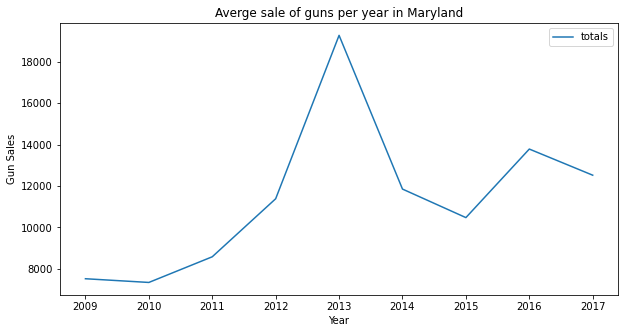

In [36]:
pd.DataFrame(md_gun.groupby('year').mean()).reset_index().plot.line(x='year', y = 'totals', figsize= (10,5))
plt.xlabel('Year');
plt.ylabel('Gun Sales');
plt.title('Averge sale of guns per year in Maryland');

The answer to this is quite startling as the answer is resounding. 2013 is the highest year for gun sales in Maryland. After reviewing Maryland gun law legislation, it appears as though 2013 was the year the Maryland General Assembly approved the Firearm Safety Act of 2013. This is legislation imposing restrictions on gun ownership and was considered controversial at the time. More can be read about the law here:
* [Maryland Gun Laws - Wikipedia](https://en.wikipedia.org/wiki/Gun_laws_in_Maryland#Laws_prohibiting_firearms)
* [Firearm Safety Act of 2013](http://mgaleg.maryland.gov/2013RS/bills/sb/sb0281e.pdf)

An interesting correlation to make is the link between media coverage of gun control and increases in gun sales, as we see is the case in Maryland in 2013. A [New York Times article published in 2016](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html) details the national trend of gun sales in relation to terrorist events and Barack Obamas elections in which he called for tighter gun control laws.

### Research Question 2:
### What was the most sold gun type in Maryland during the second highest year for gun sales?

Using the plot in question 1, the second highest year for gun sales in Maryland was 2016. For this question, we will isolate the 2016 gun sale data and plot a chart.

In [37]:
# Create new variable for 2016 gun dataset
mdgun_16 = md_gun.query('year == "2016"')

In [38]:
# Reset index for gun dataset
mdgun_16.reset_index(inplace=True)

In [39]:
# Select data to get the averages and store in new variables
handgun_avg = mdgun_16['handgun'].mean()
long_gun_avg = mdgun_16['long_gun'].mean()
other_avg = mdgun_16['other'].mean()

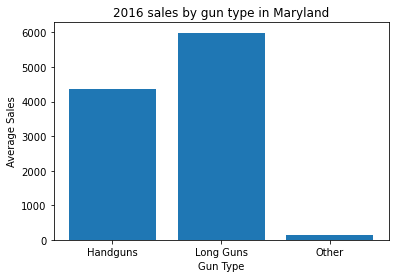

In [40]:
# Create bar chart
locations = [1,2,3]
heights = [handgun_avg, long_gun_avg, other_avg]
labels = ['Handguns', 'Long Guns', 'Other']
plt.bar(locations, heights, tick_label=labels)
plt.title('2016 sales by gun type in Maryland')
plt.xlabel('Gun Type')
plt.ylabel('Average Sales');

Long guns were the most sold gun type in Maryland in 2016. [Long guns](https://en.wikipedia.org/wiki/Long_gun) are defined as firearms with longer barrels and are generally designed to be held by both hands. According to the [FBI / NICS report](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) "other" includes all other firearms that do not fall into either the "Handgun" or "Long Gun" category.

### Research Question 3: 
### In 2016, what was Marylands gun-per-capita?

To address this question, additional data cleaning will be required. At a high level, this will include gathering only the most pertinent information from both gun and census datasets and combining them. Then the gun per capita will need to be calculated and added to the new dataset. Let's get started!

In [41]:
# Extract `year` and `totals` from mdgun_16
newmdgun_16 = mdgun_16[['year', 'totals']]
newmdgun_16.reset_index(drop=True, inplace = True)
newmdgun_16.head()

,year,totals
0,2016,17984
1,2016,17647
2,2016,14405
3,2016,12161
4,2016,12510


In [42]:
# Extract 2016 population estimates from census
population = census['population_estimates__july_1__2016___(v2016)']
population.reset_index(drop=True, inplace = True)

In [43]:
# Create combined dataset by adding population to mdgun_16
newmdgun_16['population'] = population

#### NOTE
This is starting to look good. Next, we will address the issue with population. In order to convert it to a float, we need to remove the commas. Then address the NaN backfill for the other rows.

In [44]:
# Remove comma from population
newmdgun_16['population'] = newmdgun_16['population'].str.replace(",", "")

In [45]:
# Convert population to float
newmdgun_16.astype({'population': float})

,year,totals,population
0,2016,17984,6016447.0
1,2016,17647,NaN
2,2016,14405,NaN
3,2016,12161,NaN
4,2016,12510,NaN
5,2016,12228,NaN
6,2016,11647,NaN
7,2016,11176,NaN
8,2016,13007,NaN
9,2016,14546,NaN


In [46]:
# Fill missing NaN values in 'population' to '0'
newmdgun_16['population'].fillna('0', inplace= True )

In [47]:
# Add new column `state`
newmdgun_16['state'] = 'Maryland'

In [48]:
# Reorder columns
newmdgun_16 = newmdgun_16[['state', 'year', 'totals', 'population']]

#### NOTE
A `state` column was added so that later on the data will be crystal clear at a glance. It was also an opportunity to rearrange the columns in a more meaningful way.

In the cells below, you will see I take the `sum` of the `totals` column and create a new row with that value. Then, a new column is created in order to store the value from `sum`. At this point, we no longer need the `totals` column or the remaining rows other than the first.

In [49]:
# Sum `totals` column to one row
newmdgun_16.loc['total_sum'] = pd.Series(newmdgun_16['totals'].sum(), index = ['totals'])
newmdgun_16.tail()

,state,year,totals,population
8,Maryland,2016.0,13007.0,0
9,Maryland,2016.0,14546.0,0
10,Maryland,2016.0,14735.0,0
11,Maryland,2016.0,13321.0,0
total_sum,NaN,NaN,165367.0,NaN


In [50]:
# Create new column for `total_gun_sales` with its value assigned
newmdgun_16['total_gun_sales'] = '496101.0'

In [51]:
# Drop original `totals` column
newmdgun_16.drop('totals', axis=1, inplace=True)

In [52]:
# Drop all remaining rows except first
newmdgun_16.drop(newmdgun_16.index[1:], inplace=True)

In [53]:
# Convert `year` to integer, and `population` and `total_gun_sales` to floats
newmdgun_16.year = newmdgun_16.year.astype(int)
newmdgun_16.population = newmdgun_16.population.astype(float)
newmdgun_16.total_gun_sales = newmdgun_16.total_gun_sales.astype(float)

In [54]:
# Create gun per capita column based on formula
newmdgun_16['guns_per_1000'] = newmdgun_16['total_gun_sales']/newmdgun_16['population'] * 1000
newmdgun_16.head()

,state,year,population,total_gun_sales,guns_per_1000
0,Maryland,2016,6016447.0,496101.0,82.45747


#### NOTE
After correcting the datatypes, I create a new gun per capita column and provide the formula which outputs the new data that is small but meaningul and easy to read. 

The gun per capita of Maryland in 2016 is 82.

So in 2016, for every 1000 people in Maryland, 82 of them have firearms.

## Results and Conclusions
I first investigated what year had the most gun sales in Maryland. After calculating the average and plotting the results, it became clear that 2013 had the most sales. Without additional data and doing statistical tests, it is difficult to draw any correlations. However, I do link to a few sources that could help explain the very significant increase in 2013.

Next, I looked at the most sold gun types in Maryland. Using the data analysis from the first question, I was able to see 2016 was the second highest year after 2013 for gun sales. Therefore, I decided to investigate what type of gun was sold the most in 2016. Each gun type sale was averaged and a bar chart was used to illustrate the results. The long gun was the most sold gun type in 2016, followed by handguns.

Then, I was curious about gun per capita in Maryland. This was calculated as an estimate of the total number of gun sales per 1000 persons. 

## Limitations
While this data analysis is clear, it certainly has limitations. The quality of the census data was poor and difficult to parse due to poorly formatted column names, incorrect datatypes, and limited availability of years for population estimates. As well, the gun data was not without obstacles. The definitions of what the columns describe and how the gun sale estimates are being calculated is important. In addition, this data does not account for unregistered or illegal weapons. While in the end, I was able to clean this dataset, it makes it difficult to dig deeper into more meaningful analysis.